In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Social_Network_Ads.csv")


In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
df= df.iloc[:,2:]

In [11]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [15]:
df.sample(6)

,Age,EstimatedSalary,Purchased
302,37,137000,1
151,41,45000,0
50,24,32000,0
80,30,80000,0
221,35,91000,1
254,50,44000,0


# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split


In [ ]:
# x_train and y_train are used to train the model , where x_test and y_Test are Used to evaluate how well the trained model performs on unseen data.

In [20]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape


((280, 2), (120, 2))

In [23]:
print(x_train,x_test,y_train,y_test)

     Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]      Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000
..   ...              ...
216   49            65000
259   45           131000
49    31            89000
238   46            82000
343   47            51000

[120 rows x 2 columns] 92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64 132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64


# StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit the scaler to the train set , it wll learn the parameters
scaler.fit(x_train)


#transform the train and test set
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [31]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [41]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [39]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [43]:
np.round(x_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [45]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

Text(0.5, 1.0, 'Before Scaling')

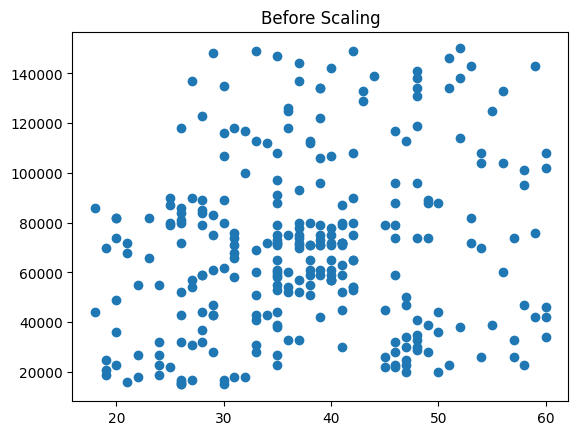

In [48]:
plt.scatter(x_train["Age"],x_train["EstimatedSalary"])
plt.title("Before Scaling")

Text(0.5, 1.0, 'Before Scaling')

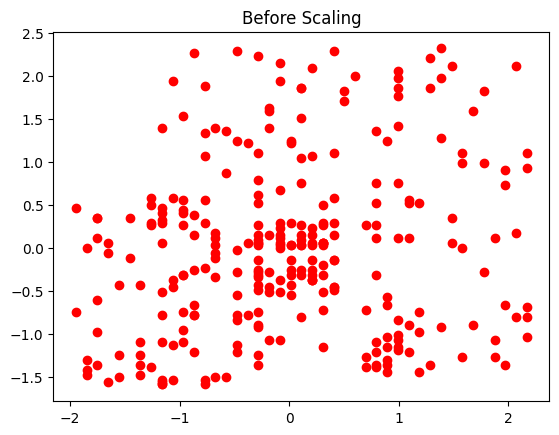

In [50]:
plt.scatter(x_train_scaled["Age"],x_train_scaled["EstimatedSalary"],color='r')
plt.title("Before Scaling")

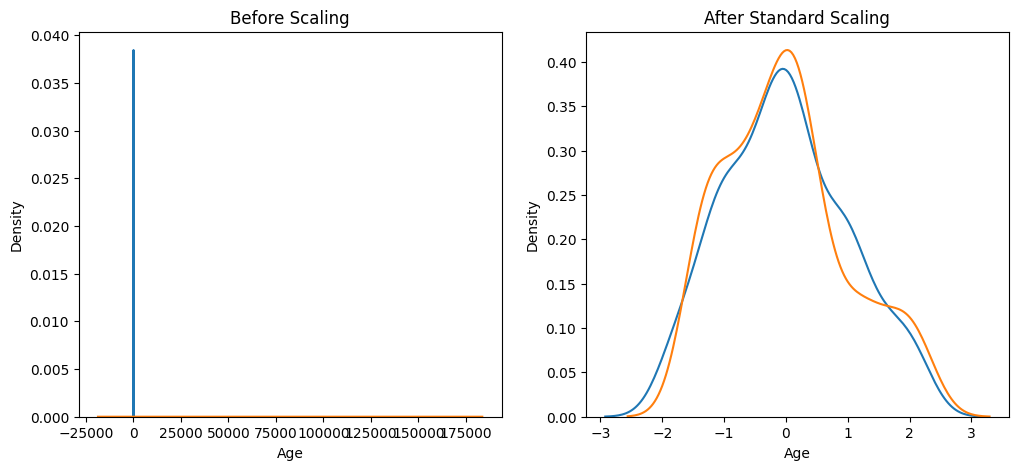

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Comparison of Distribution

<Axes: title={'center': 'Age Distribution before scaling'}, xlabel='Age', ylabel='Density'>

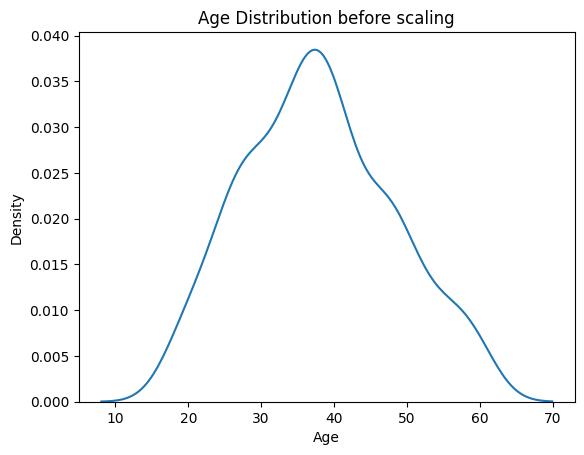

In [55]:
plt.title("Age Distribution before scaling")
sns.kdeplot(x_train['Age'])

<Axes: title={'center': 'Age Distribution after scaling'}, xlabel='Age', ylabel='Density'>

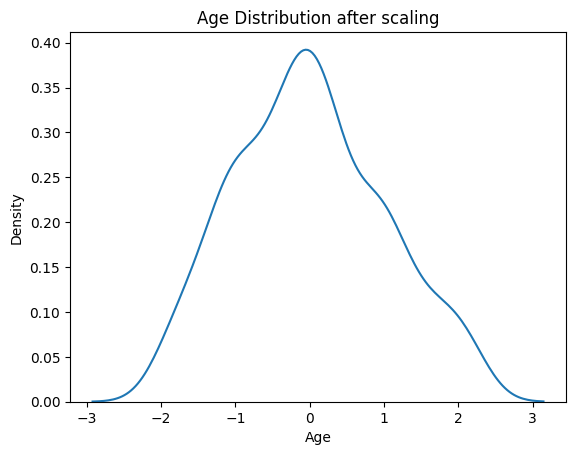

In [57]:
plt.title("Age Distribution after scaling")
sns.kdeplot(x_train_scaled['Age'])

<Axes: title={'center': 'Salary Distribution before scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

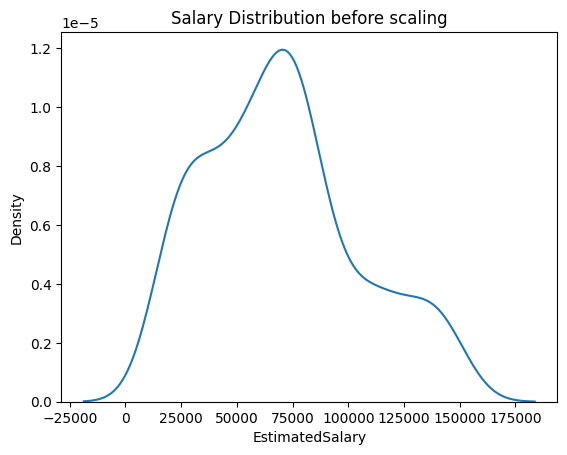

In [59]:
plt.title("Salary Distribution before scaling")
sns.kdeplot(x_train['EstimatedSalary'])

<Axes: title={'center': 'Salary Distribution after scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

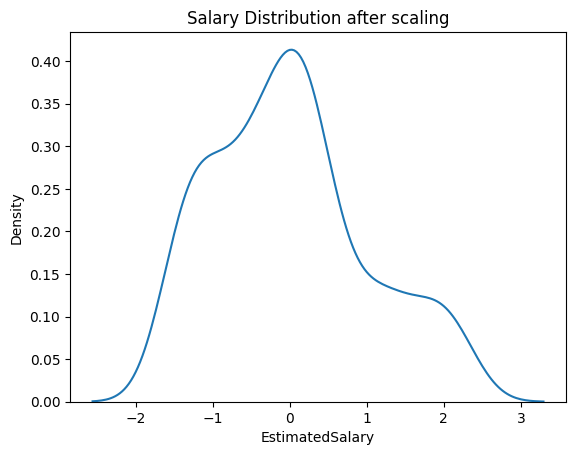

In [61]:
plt.title("Salary Distribution after scaling")
sns.kdeplot(x_train_scaled['EstimatedSalary'])

# why Saling is import

In [82]:
from sklearn.linear_model import LogisticRegression

In [84]:
lg= LogisticRegression()

In [86]:
lg_scaled = LogisticRegression()


In [88]:
lg.fit(x_train,y_train)

LogisticRegression()

In [90]:
lg_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [98]:
y_pred = lg.predict(x_test)
y_pred_scaled = lg_scaled.predict(x_test_scaled)

In [100]:
from sklearn.metrics import accuracy_score


In [102]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [104]:
from sklearn.tree import DecisionTreeClassifier


In [110]:
dt = DecisionTreeClassifier()
dt_Scaled = DecisionTreeClassifier()


In [112]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [114]:
dt_Scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [116]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_Scaled.predict(x_test_scaled)

In [118]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.8666666666666667


In [120]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outliers

In [127]:
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})

df = pd.concat([df, new_data], ignore_index=True)

In [129]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


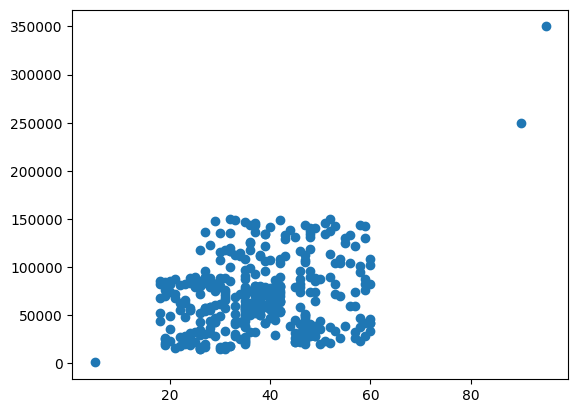

In [131]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

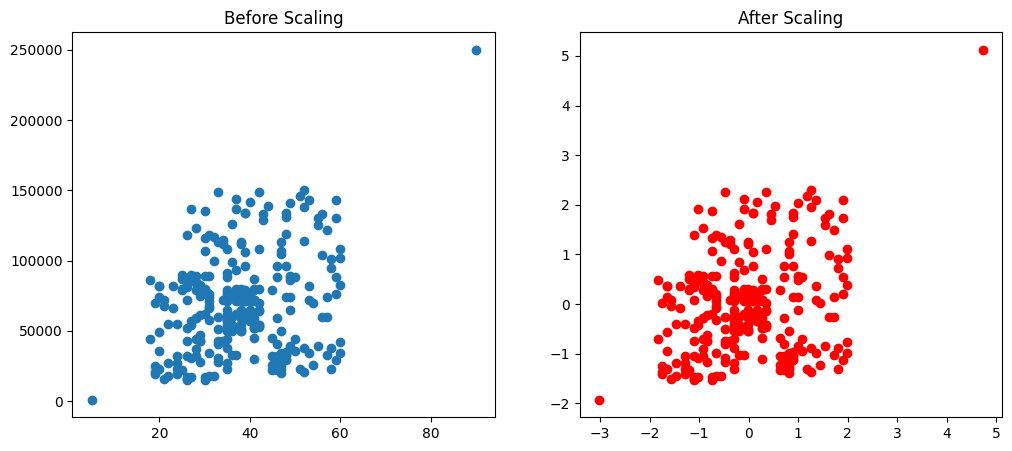

In [139]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()